<h1><b><center>IS652 - Data Exploration and Visualization </center></b></h1>

<h2><b><center> Assignment 1 (Northwind Data Exploration and Visualization) </center></b></h2>
<h3><b><center> FAISAL RIAZ      [f2019313020@umt.edu.pk]</center></b></h3>

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",20)
pd.set_option("display.precision",2)

In [3]:
path=r'D:\UMT_MSDS\Semester4\Assignment1'
os.chdir(path)

In [4]:
#Import Excel File usng pandas and make separate dataframes for required only tables from each tab

with pd.ExcelFile('northwind.xls') as xls:
    df_Categories = xls.parse('Categories')
    df_Employee = xls.parse('Employees')
    df_OrderDetails = xls.parse('Orders Details')
    df_Orders = xls.parse('Orders')
    df_Product = xls.parse('Product')

In [5]:
 # choosing only required columns
df_Categories = df_Categories[['CategoryID','CategoryName']]

In [6]:
# choosing only required columns
df_Orders=df_Orders[['OrderID','EmployeeID','OrderDate','ShipCountry']]

In [7]:
# choosing only required columns
df_Employee=df_Employee[['EmployeeID','FirstName','LastName']]
# Concatinating First Name and Last Name to Create new column/attribute EmployeeName and dropping others.
df_Employee['EmployeeName']=df_Employee['FirstName'].str.cat(df_Employee['LastName'],sep=" ")
df_Employee.drop(['FirstName','LastName'],axis=1,inplace=True)

In [8]:
df_Product = df_Product[['ProductID','CategoryID']]

## Creating one main dataframe to answer all questions

In [9]:
# Merging Orders and Order details on key = OrderID
df = pd.merge(df_Orders,df_OrderDetails,how='left',left_on=['OrderID'],right_on=['OrderID'])
# Merging Product on key = ProductID
df = pd.merge(df,df_Product,how='left',left_on=['ProductID'],right_on=['ProductID'])
# Merging Categories on key = CategoryID
df = pd.merge(df,df_Categories,how='left',left_on=['CategoryID'],right_on=['CategoryID'])
# Merging Employee  on key = Employee ID
df = pd.merge(df,df_Employee,how='left',left_on=['EmployeeID'],right_on=['EmployeeID'])
# dropping redundant columns
df.drop(['EmployeeID','CategoryID','ProductID'],axis=1,inplace=True)
# Extracting month from order date
df['OrderMonth'] = pd.DatetimeIndex(df['OrderDate']).month
# Caluctating the sale for each orderID
df['Sale']=df['UnitPrice']* df['Quantity'] 
# Calculating actual sale after discount
df['ActualSale']=df['Sale'] - (df['Sale']*df['Discount']) 
# Calculating actual discount on sale
df['ActualDiscount']=(df['Sale'])*(df['Discount'])
df.head(10)

,OrderID,OrderDate,ShipCountry,UnitPrice,Quantity,Discount,CategoryName,EmployeeName,OrderMonth,Sale,ActualSale,ActualDiscount
0,10248,1996-07-04,France,14.0,12,0.00,Dairy Products,Steven Buchanan,7,168.0,168.00,0.00
1,10248,1996-07-04,France,9.8,10,0.00,Grains/Cereals,Steven Buchanan,7,98.0,98.00,0.00
2,10248,1996-07-04,France,34.8,5,0.00,Dairy Products,Steven Buchanan,7,174.0,174.00,0.00
3,10249,1996-07-05,Germany,18.6,9,0.00,Produce,Michael Suyama,7,167.4,167.40,0.00
4,10249,1996-07-05,Germany,42.4,40,0.00,Produce,Michael Suyama,7,1696.0,1696.00,0.00
5,10250,1996-07-08,Brazil,7.7,10,0.00,Seafood,Margaret Peacock,7,77.0,77.00,0.00
6,10250,1996-07-08,Brazil,42.4,35,0.15,Produce,Margaret Peacock,7,1484.0,1261.40,222.60
7,10250,1996-07-08,Brazil,16.8,15,0.15,Condiments,Margaret Peacock,7,252.0,214.20,37.80
8,10251,1996-07-08,France,16.8,6,0.05,Grains/Cereals,Janet Leverling,7,100.8,95.76,5.04
9,10251,1996-07-08,France,15.6,15,0.05,Grains/Cereals,Janet Leverling,7,234.0,222.30,11.70


In [10]:
# missing values confirmation
df.isna().sum()

OrderID           0
OrderDate         0
ShipCountry       0
UnitPrice         0
Quantity          0
Discount          0
CategoryName      0
EmployeeName      0
OrderMonth        0
Sale              0
ActualSale        0
ActualDiscount    0
dtype: int64

## Question no 01:
### 1. Sales per Category: Result in Table and Pie Chart.

### Filtered DataFrame for all the months in Year 1997.

In [11]:
# filtered dataframe for year 1997
df_1997 = df[(df['OrderDate']>='1997-01-01') & (df['OrderDate']<= '1997-12-31')]

In [12]:
df_q1 = df[['CategoryName','ActualSale']]
df_q1=df_q1.groupby(['CategoryName']).sum()
df_q1

,ActualSale
CategoryName,
Beverages,267868.18
Condiments,106047.08
Confections,167357.22
Dairy Products,234507.28
Grains/Cereals,95744.59
Meat/Poultry,163022.36
Produce,99984.58
Seafood,131261.74


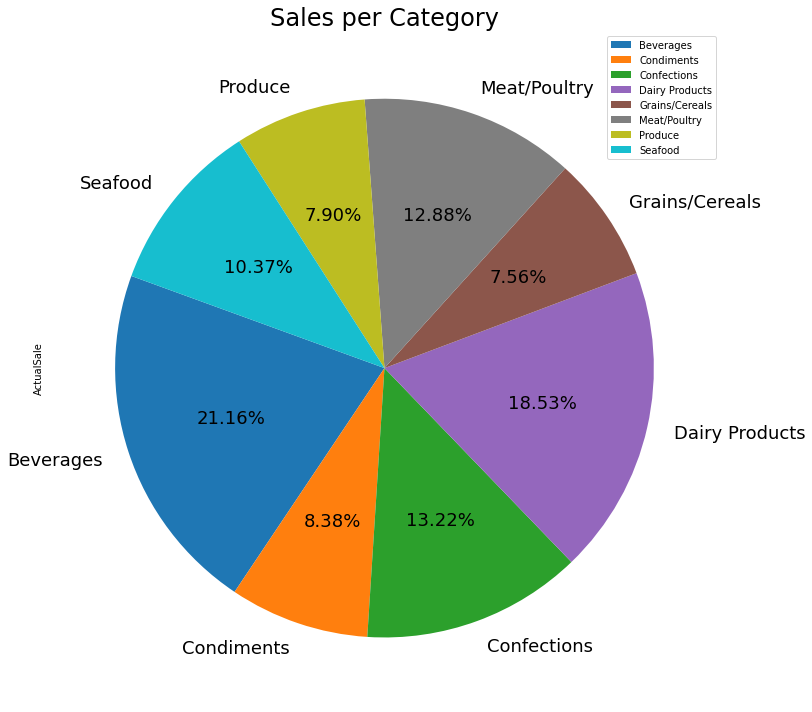

In [13]:
# Pie plot using pandas, percentage of sales per category
df_q1.plot.pie(y='ActualSale', figsize=(14, 10),colormap = 'tab10', autopct='%1.2f%%',fontsize=18,startangle=160)
plt.title('Sales per Category',fontsize=24)
plt.legend(loc= 'upper right')
plt.tight_layout()
plt.show()

## Question no. 02
### 2. Sales per customer country and category: Result in Table and Clustered horizontal bar chart. Line plot on secondary Y-axis with total sales per country of all categories.

In [14]:
# Selecting Sales per customer country per category from main dataframe
Sales_per_country_category = df[['ShipCountry','CategoryName','ActualSale']]
Sales_per_country_category.head(10)

,ShipCountry,CategoryName,ActualSale
0,France,Dairy Products,168.00
1,France,Grains/Cereals,98.00
2,France,Dairy Products,174.00
3,Germany,Produce,167.40
4,Germany,Produce,1696.00
5,Brazil,Seafood,77.00
6,Brazil,Produce,1261.40
7,Brazil,Condiments,214.20
8,France,Grains/Cereals,95.76
9,France,Grains/Cereals,222.30


In [15]:
# Sales per country per category
df_q2=pd.pivot_table(df, values='ActualSale',index=['ShipCountry'],columns='CategoryName')
df_q2.replace(np.nan, 0)

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
ShipCountry,,,,,,,,
Argentina,256.86,302.33,266.89,190.58,390.00,0.00,284.75,121.30
Austria,1059.88,952.33,966.74,1040.99,968.51,1082.16,1457.85,778.19
Belgium,493.52,409.13,747.96,962.22,460.86,534.62,805.80,242.82
Brazil,929.84,430.03,336.36,522.68,437.25,540.22,694.75,339.14
Canada,1025.10,476.01,589.50,682.66,555.76,941.70,704.00,540.51
Denmark,1717.96,432.51,370.21,528.86,99.75,790.62,1318.30,428.58
Finland,242.49,374.60,146.44,505.28,495.40,556.80,221.28,207.88
France,371.36,463.34,457.72,385.23,266.96,779.38,549.84,459.56
Germany,910.57,539.89,652.34,763.71,545.59,932.86,800.66,454.81


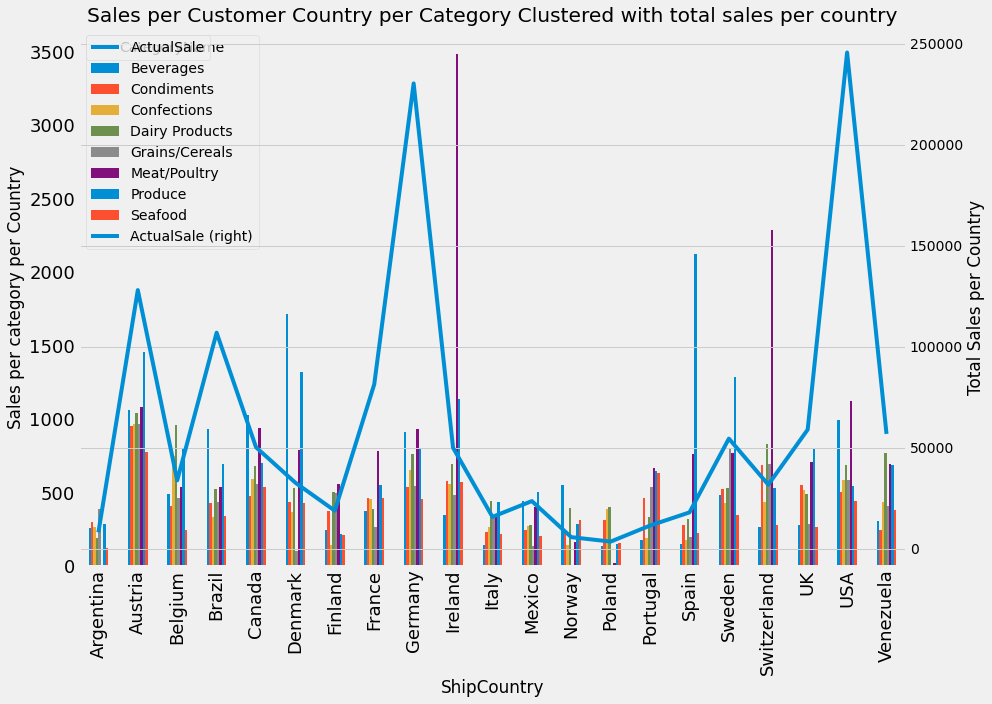

In [16]:
# Sales per category per country with total sales per country on secondary axis
plt.style.use('fivethirtyeight')
ax=df_q2.plot(kind='bar',figsize=(14,10),fontsize=18)
Sales_per_country_category.groupby(['ShipCountry']).sum().plot(kind='line',secondary_y=True,rot =90, ax = ax)
plt.title('Sales per Customer Country per Category Clustered with total sales per country')
plt.xlabel('Customer Country')
plt.ylabel('Total Sales per Country')
ax.set_ylabel('Sales per category per Country')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Question no. 03
### 3.  Sales per Category in each month of year 1997. Result in Table and Staked bar chart.

In [17]:
# Sales per category in each month of 1997 using filtered dataframe
df_q3=pd.pivot_table(df_1997, values='ActualSale',index=['OrderMonth'],columns='CategoryName')
df_q3.head(12)

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
OrderMonth,,,,,,,,
1,2190.42,656.51,434.67,647.60,649.69,684.28,540.98,181.17
2,237.15,875.55,436.18,465.40,469.37,840.11,535.92,251.36
3,664.80,235.02,267.49,810.74,452.51,599.70,525.26,316.68
4,471.62,426.49,961.55,641.73,727.16,1102.24,982.31,368.03
5,1101.59,605.89,591.52,417.42,453.45,485.07,774.90,316.75
6,232.36,309.21,362.48,528.49,634.58,703.36,831.96,366.49
7,493.08,613.31,497.12,884.81,557.22,961.26,825.00,784.77
8,343.35,527.50,592.14,620.60,601.69,814.71,612.00,622.22
9,636.30,397.24,372.70,713.77,447.62,1368.25,706.82,476.51


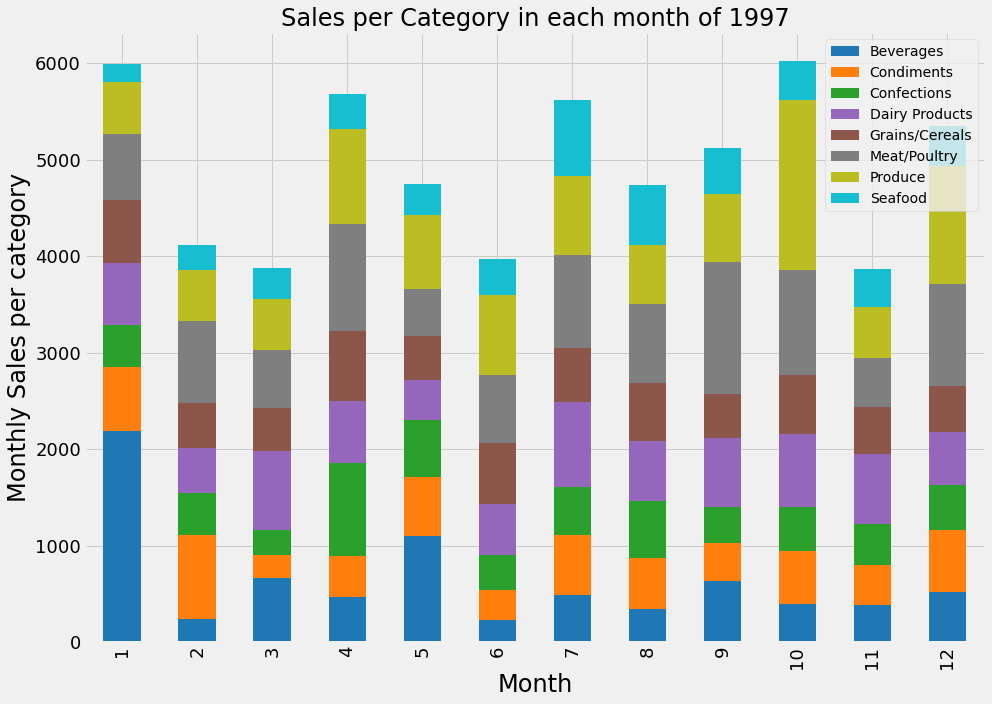

In [18]:
# sales per category in each month of 1997 stacked for each category
df_q3.plot(kind='bar',figsize=(14,10),fontsize=18,stacked=True , colormap ='tab10')
plt.title('Sales per Category in each month of 1997',fontsize=24)
plt.xlabel('Month',fontsize=24)
plt.ylabel('Monthly Sales per category',fontsize=24)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Question no. 04
### 4.  Discounts per Category in each month of year 1997. Result in Table and Area Chart.

In [19]:
# Discount per category in each month of 1997 using filtered dataframe
df_q4=pd.pivot_table(df_1997, values='ActualDiscount',index=['OrderMonth'],columns='CategoryName')
df_q4.head(12)

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
OrderMonth,,,,,,,,
1,232.02,55.84,21.63,57.54,3.20,93.30,38.02,26.26
2,20.38,69.93,27.16,2.60,34.97,97.99,3.84,34.11
3,24.40,37.25,9.58,9.63,26.06,54.62,0.00,8.69
4,20.21,27.58,14.67,96.82,1.24,38.80,40.54,42.73
5,16.55,30.64,23.67,42.24,56.85,21.79,95.40,18.57
6,7.77,5.26,53.25,65.74,53.67,11.83,58.19,19.88
7,28.39,142.10,38.88,84.48,40.28,19.20,0.00,60.46
8,18.65,35.22,76.64,49.90,12.67,9.23,24.43,20.44
9,52.45,19.30,26.88,39.61,32.02,182.57,14.99,22.93


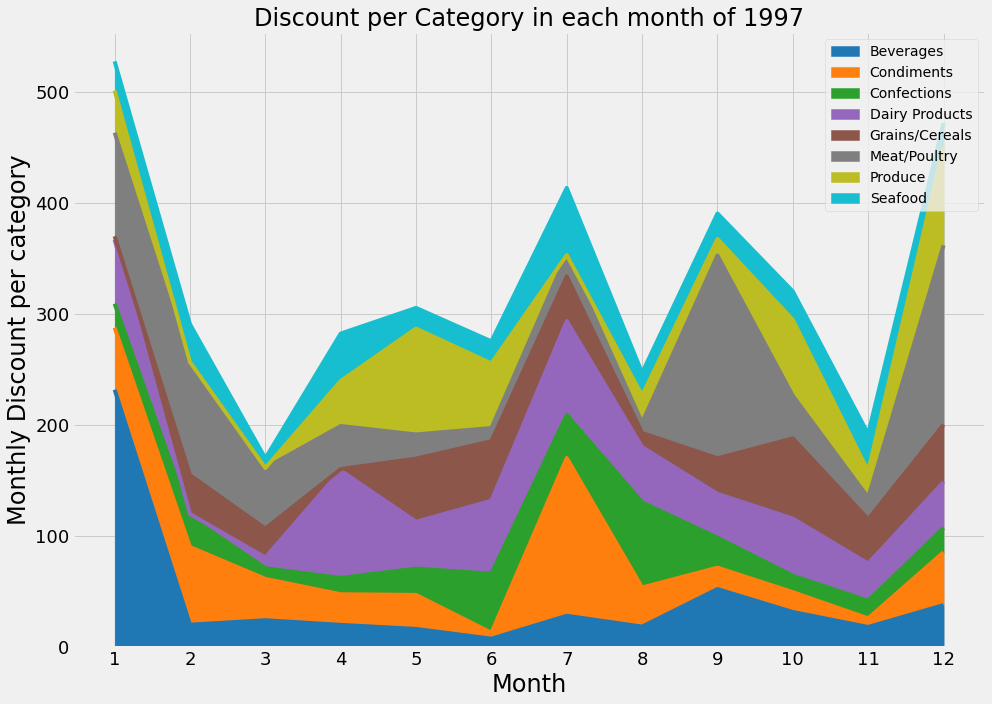

In [20]:
df_q4.plot(kind='area',figsize=(14,10),fontsize=18,colormap='tab10')
plt.title('Discount per Category in each month of 1997',fontsize=24)
plt.xlabel('Month',fontsize=24)
plt.ylabel('Monthly Discount per category',fontsize=24)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Question no. 05
### 5. Sales per Employee in each month of year 1997. Result in Scatter plot.

In [21]:
df_q5=pd.pivot_table(df_1997, values='ActualSale',index=['OrderMonth'],columns='EmployeeName')
df_q5.replace(np.nan, 0)

EmployeeName,Andrew Fuller,Anne Dodsworth,Janet Leverling,Laura Callahan,Margaret Peacock,Michael Suyama,Nancy Davolio,Robert King,Steven Buchanan
OrderMonth,,,,,,,,,
1,339.99,322.27,410.65,506.54,1078.93,345.00,916.45,1246.37,0.00
2,1584.00,0.00,444.03,411.30,638.00,165.53,389.28,778.20,0.00
3,355.61,501.73,1288.82,391.33,402.31,298.80,366.01,766.40,280.04
4,1192.60,188.27,732.32,133.42,641.71,1065.94,120.00,332.46,0.00
5,397.57,69.90,1128.10,489.16,432.20,106.81,569.75,425.92,750.05
6,860.27,435.31,430.75,377.15,314.06,494.97,455.70,694.00,506.23
7,1327.50,23.80,270.49,322.53,502.81,325.25,849.17,463.66,1295.08
8,28.75,361.50,530.15,345.67,634.06,596.07,638.09,958.08,512.22
9,488.77,1755.23,355.59,689.70,528.75,201.40,372.08,1019.22,337.47


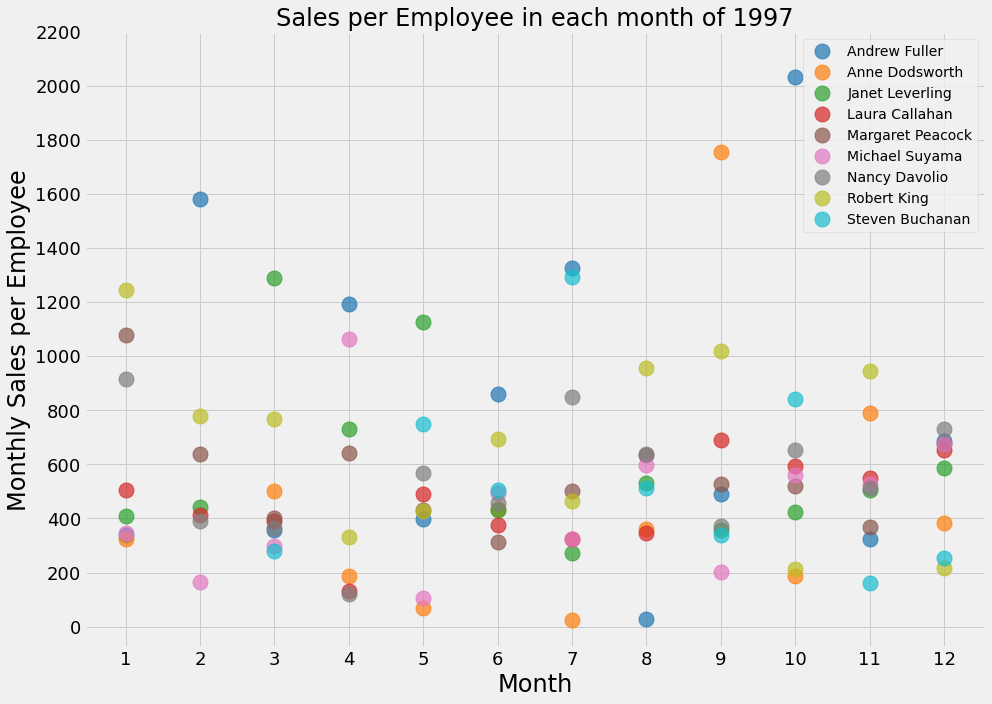

In [22]:
#sale per employee in each month of 1997
df_q5.plot(style="o", figsize=(14,10),ms=15, alpha=0.7,colormap = 'tab10',fontsize=18)
plt.title('Sales per Employee in each month of 1997',fontsize=24)
plt.xlabel('Month',fontsize=24)
plt.ylabel('Monthly Sales per Employee',fontsize=24)
plt.legend(loc='best')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.yticks(ticks=list(range(0,2400,200)))
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()